In [101]:
from random import shuffle

def createArray(arrayLength : int) -> list[int]:
	unSortedList = list()
	for i in range(arrayLength):
		unSortedList.append(i)
	shuffle(unSortedList)
	return unSortedList


unSortedList = createArray(8)
print(unSortedList)

[7, 4, 6, 0, 1, 3, 5, 2]


In [104]:
def insertionSortSteps(array : list) -> list[int] and int:
	steps = 0
	for _ in range(len(array)):
		j = _
		steps += 1
		while j > 0 and array[j-1] > array[j]:
			array[j-1], array[j] = array[j], array[j-1]
			j -= 1
			steps += 2
	return array, steps


unSortedList = createArray(8)
sortedList, steps = insertionSortSteps(unSortedList)
print(steps)

32


'DONE!'

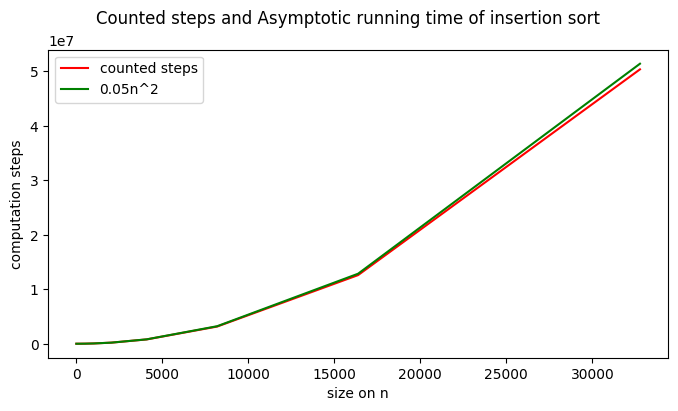

In [120]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [8,4]

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('Counted steps and Asymptotic running time of insertion sort')

array = createArray(4)
points = 13
x = []
y = []
ref = []
c = []



for i in range(0, points):
	clear_output(wait=True)
	sortedArray, steps = insertionSortSteps(array)
	array = array * 2
	x.append(len(array))
	y.append(steps)
	c.append(steps/len(array)**2)

for v in x:
	ref.append(v**2 * c[6])



ax.plot(x, y, color="red", label="counted steps")
ax.plot(x, ref, color="green", label= str(round(c[6],2)) + "n^2")
ax.set_xlabel("size on n")
ax.set_ylabel("computation steps")
ax.legend()

"DONE!"


In [106]:
counter = 0
def mergeSortSteps(array : list) -> list[int] and int:
	global counter
	if len(array) > 1:
		middlePoint = int(len(array) / 2)

		nArray1 = array[0:middlePoint]
		nArray2 = array[middlePoint:]
		nArray1 = mergeSortSteps(nArray1)
		nArray2 = mergeSortSteps(nArray2)

		output = mergeSteps(nArray1, nArray2)
		counter += 6
		return output
	return array

def mergeSteps(leftArray : list[int], rightArray : list[int]) -> list[int]:
	global counter
	output = list()
	i = j = 0
	counter += 2
	while i < len(leftArray) and j < len(rightArray):

		if leftArray[i] < rightArray[j]:
			output.append(leftArray[i])
			i += 1
			counter += 1
		else:
			output.append(rightArray[j])
			j += 1
			counter += 1
	
	for _ in range(i, len(leftArray)):
		output.append(leftArray[_])
		counter += 1
	
	for _ in range(j, len(rightArray)):
		output.append(rightArray[_])
		counter += 1
	#print(f"merged into {output}")
	return output

unSortedList = createArray(8)
print(unSortedList)
sortedList = mergeSortSteps(unSortedList)
print(f'Counter is {counter}')

[3, 2, 6, 1, 4, 0, 5, 7]
Counter is 80


491520.0


'DONE!'

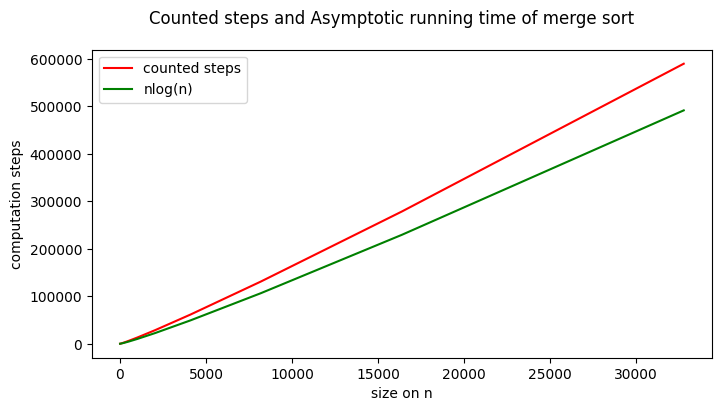

In [121]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['figure.figsize'] = [8,4]

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('Counted steps and Asymptotic running time of merge sort')

counter = 0
array = createArray(8)
points = 13
x = []
y = []
ref = []
c = []


length = 8
for i in range(0, points):
	clear_output(wait=True)
	sortedArray = mergeSortSteps(array)
	array = createArray(length)
	length *= 2
	x.append(len(array))
	y.append(counter)
	result = (len(array) * math.log(len(array), 2))
	c.append(counter/result)


for v in x:
	ref.append( v * (math.log(v, 2)))


ax.plot(x, y, color="red", label="counted steps")
ax.plot(x, ref, color="green", label="nlog(n)" )
ax.set_xlabel("size on n")
ax.set_ylabel("computation steps")
ax.legend()

"DONE!"


In [108]:
def quicksort(liste, start, slutt):
    steg = 0
    if start < slutt:
        midt, partition_steg = partition(liste, start, slutt)
        steg += partition_steg
        steg += quicksort(liste, start, midt-1)
        steg += quicksort(liste, midt+1, slutt)
    return steg


def partition(liste, start, slutt):
    steg = 0
    pivot = liste[slutt]
    i = start-1
    steg += 2
    for j in range(start, slutt):
        if liste[j] <= pivot:
            i += 1
            liste[i], liste[j] = liste[j], liste[i]
            steg += 2
        steg += 1
    liste[i+1], liste[slutt] = liste[slutt], liste[i+1]
    steg += 1
    return i+1, steg


unSortedList = createArray(8)
print(unSortedList)
sortedList = quicksort(unSortedList, 0, len(unSortedList)-1)

[3, 4, 0, 6, 7, 2, 1, 5]


'DONE!'

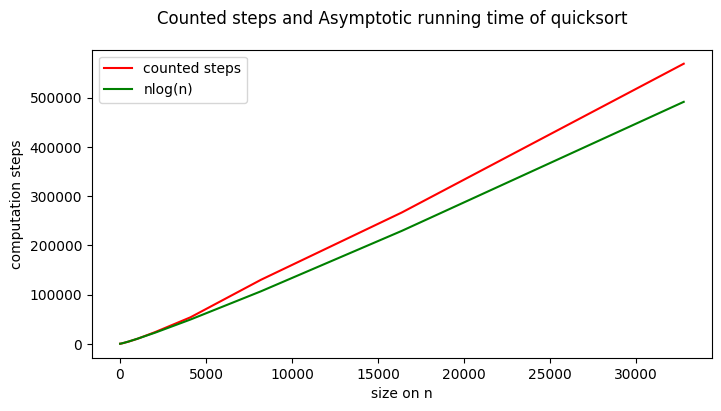

In [123]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['figure.figsize'] = [8,4]

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('Counted steps and Asymptotic running time of quicksort')

counter = 0
array = createArray(8)
points = 13
x = []
y = []
ref = []
c = []


length = 8
for i in range(0, points):
	clear_output(wait=True)
	steps = quicksort(array, 0, len(array)-1)
	array = createArray(length)
	length *= 2
	x.append(len(array))
	y.append(steps)
	c.append(steps/len(array)**2)
	

for v in x:
	ref.append( v * (math.log(v, 2)))


ax.plot(x, y, color="red", label="counted steps")
ax.plot(x, ref, color="green", label="nlog(n)" )
ax.set_xlabel("size on n")
ax.set_ylabel("computation steps")
ax.legend()

"DONE!"

In [110]:
import heapq
import math

def heapsort(list):
    n = len(list)
    steps = 0
    result = []
    heapq.heapify(list)
    steps += n * math.log(n, 2)
    for i in range(len(list)):
        result.append(heapq.heappop(list))
        steps += math.log(n, 2)
    return result, steps

unSortedList = createArray(8)
print(unSortedList)
sortedList, steps = heapsort(unSortedList)
print(sortedList, steps)

[0, 4, 3, 7, 5, 2, 6, 1]
[0, 1, 2, 3, 4, 5, 6, 7] 48.0


'DONE!'

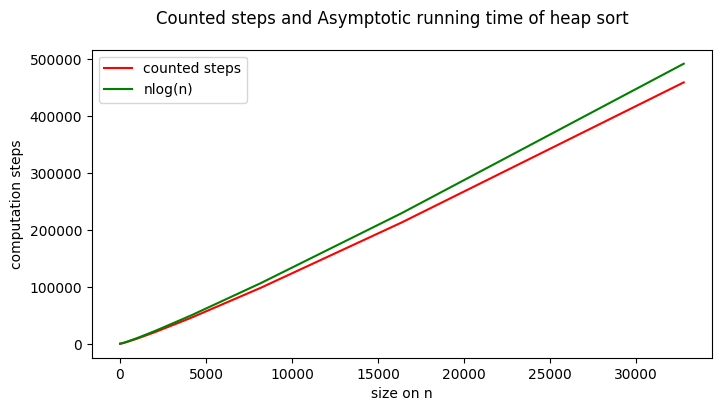

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['figure.figsize'] = [8,4]

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('Counted steps and Asymptotic running time of heap sort')

array = createArray(8)
points = 13
x = []
y = []
ref = []
c = []


length = 8
for i in range(0, points):
	clear_output(wait=True)
	array, steps = heapsort(array)
	array = createArray(length)
	length *= 2
	x.append(len(array))
	y.append(steps)
	result = (len(array) * math.log(len(array), 2))
	c.append(steps/result)


for v in x:
	ref.append( v * (math.log(v, 2)))


ax.plot(x, y, color="red", label="counted steps")
ax.plot(x, ref, color="green", label="nlog(n)" )
ax.set_xlabel("size on n")
ax.set_ylabel("computation steps")
ax.legend()

"DONE!"